In [1]:
import keras
from keras.layers import Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Model
from keras.layers import Input
from keras.layers import BatchNormalization
from keras.layers import UpSampling2D
from keras.layers import Concatenate

Using TensorFlow backend.


In [2]:
import scipy.io as scio
import numpy as np    
import os
import matplotlib.pyplot as plt
from scipy.misc import imsave
from scipy import ndimage, misc

In [3]:
images = []
for root, dirnames, filenames in os.walk("Dataset/Train_images/"):
    for filename in filenames:
        filepath = os.path.join(root, filename)
        image = ndimage.imread(filepath, mode="L")
        images.append(image)

In [4]:
print (len(image))


496


In [5]:
labels = np.load('train_labels.npy')
labels_list = []
for i in range(len(labels)):
    labels_list.append(labels[i])

In [22]:
print (len(labels_list))
print (type(labels_list[0]))


images=np.array(images)
print(images.shape[0])
images = images.reshape(images.shape[0],496,64,1)

print(images[0].shape)
train_labels=labels_list[0:500]
train_images=images[0:500]
test_labels = labels_list[500:770]
test_images = images[500:770]

770
<type 'numpy.ndarray'>
770
(496, 64, 1)


In [7]:
print (len(train_images))
print (len(train_labels))
print (np.array(train_labels).shape)

500
500
(500, 496, 64, 8)


In [8]:
# Defines the input tensor
inputs = Input(shape=(496,64,1))

L1 = Conv2D(64,kernel_size=(7,3),activation = 'relu',padding = "same")(inputs)
L2 = BatchNormalization()(L1)
L3 = MaxPooling2D(pool_size=(2,2))(L2)
L4 = Conv2D(64,kernel_size=(7,3),activation = 'relu',padding = "same")(L3)
L5 = BatchNormalization()(L4)
L6 = MaxPooling2D(pool_size=(2,2))(L5)
L7 = Conv2D(64,kernel_size=(7,3),activation = 'relu',padding = "same")(L6)
L8 = BatchNormalization()(L7)
L9 = MaxPooling2D(pool_size=(2,2))(L8)
L10 = Conv2D(64,kernel_size=(7,3),activation = 'relu',padding = "same")(L9)
L11 = BatchNormalization()(L10)
L12 = UpSampling2D(size = (2,2))(L11)
L13 = Concatenate(axis = 3)([L8,L12])
L14 = Conv2D(64,kernel_size=(7,3),activation = 'relu',padding = "same")(L13)
L15 = BatchNormalization()(L14)
L16 = UpSampling2D(size= (2,2))(L15)
L17 = Concatenate(axis = 3)([L16,L5])
L18 = Conv2D(64,kernel_size=(7,3),activation = 'relu',padding = "same")(L17)
L19 = BatchNormalization()(L18)
L20 = UpSampling2D(size=(2,2))(L19)
L21 = Concatenate(axis=3)([L20,L2])
L22 = Conv2D(64,kernel_size=(7,3),activation = 'relu',padding = "same")(L21)
L23 = BatchNormalization()(L22)
L24 = Conv2D(8,kernel_size=(1,1),activation = 'softmax',padding = "same")(L23)

model = Model(inputs = inputs, outputs = L24)
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 496, 64, 1)    0                                            
____________________________________________________________________________________________________
conv2d_1 (Conv2D)                (None, 496, 64, 64)   1408        input_1[0][0]                    
____________________________________________________________________________________________________
batch_normalization_1 (BatchNorm (None, 496, 64, 64)   256         conv2d_1[0][0]                   
____________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)   (None, 248, 32, 64)   0           batch_normalization_1[0][0]      
___________________________________________________________________________________________

In [11]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [12]:
train_images_2=np.array(images)
train_labels_2=np.array(labels_list)
model.fit(train_images_2,train_labels_2,batch_size=8,epochs=2,validation_split = 0.33)

Train on 515 samples, validate on 255 samples
Epoch 1/2
515/515 [==============================] - 1487s - loss: 0.8536 - acc: 0.7956 - val_loss: 0.7650 - val_acc: 0.8141
Epoch 2/2
515/515 [==============================] - 1373s - loss: 0.7137 - acc: 0.8014 - val_loss: 0.6420 - val_acc: 0.8109


In [14]:
testing_image = ndimage.imread('Dataset/testing_image_1.png',mode = 'L')

In [21]:
testing_image = np.array(testing_image)
print(testing_image.shape[0])

496


In [23]:
testing_image = testing_image.reshape(1,496,64,1)

In [24]:
prediction = model.predict(testing_image)

In [26]:
print(prediction.shape)

(1, 496, 64, 8)


In [27]:
prediction = np.squeeze(prediction,axis = 0)

In [28]:
print(prediction.shape)


(496, 64, 8)


In [29]:
print (prediction)

[[[  9.51055288e-01   5.08835772e-03   7.64070824e-03 ...,   1.35591161e-02
     6.41391333e-03   2.03385856e-03]
  [  9.89129066e-01   1.37636391e-03   1.59470248e-03 ...,   2.83164089e-03
     7.98437861e-04   2.31422222e-04]
  [  9.93243515e-01   7.29773950e-04   1.49815169e-03 ...,   1.28048542e-03
     4.12662775e-04   1.85338038e-04]
  ..., 
  [  9.94452059e-01   7.07910745e-04   1.41219539e-03 ...,   1.00862223e-03
     3.69670161e-04   1.79604278e-04]
  [  9.95130897e-01   6.43168984e-04   1.22412457e-03 ...,   9.06944857e-04
     4.26636048e-04   1.55635309e-04]
  [  9.53116298e-01   5.21943672e-03   1.37084033e-02 ...,   8.16471688e-03
     5.32337837e-03   2.99629872e-03]]

 [[  9.71927583e-01   3.18190339e-03   4.34533600e-03 ...,   7.71330064e-03
     3.47576826e-03   1.17555854e-03]
  [  9.92332339e-01   1.05487648e-03   9.60503006e-04 ...,   1.33030058e-03
     7.65082950e-04   1.42906603e-04]
  [  9.96978879e-01   3.48684174e-04   4.96730441e-04 ...,   3.93205701e-04
  

In [45]:
print(prediction[260][45])

[ 0.40268043  0.0040052   0.01174086  0.04017023  0.02991423  0.38745448
  0.06749202  0.05654261]


In [35]:
s = [1,2,3,4]
print(np.argmax(s))

3


In [46]:
print(prediction.shape)

(496, 64, 8)


In [48]:
output = np.zeros((496,64))

In [49]:
for i in range(496):
    for j in range(64):
        index = np.argmax(prediction[i][j])
        output[i][j] = index

In [50]:
print (output.shape)

(496, 64)


In [54]:
color= np.zeros((496,64,3))

In [55]:
for j in range(496):
    for k in range(64):
        if(output[j][k]==0):
            color[j][k] = [0,0,0]
        if(output[j][k]==1):
            color[j][k] = [128,0,0]
        if(output[j][k]==2):
            color[j][k] = [0,128,0]
        if(output[j][k]==3):
            color[j][k] = [128,128,0] 
        if(output[j][k]==4):
            color[j][k] = [0,128,128]
        if(output[j][k]==5):
            color[j][k] = [64,0,0]
        if(output[j][k]==6):
            color[j][k] = [192,0,0]
        if(output[j][k]==7):
            color[j][k] = [64,128,0]

In [56]:
plt.imshow(color)

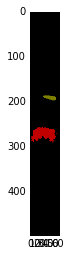

In [57]:
plt.show()